In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn

### 3.1 手寫數字圖片數據集

In [2]:
# ToTensor():[0, 255]=>[0, 1]
# Normalize(0.5, 0.5):=>[0, 1]=>[-1, 1]
# 因為MNIST為黑白，所以所以縮放至[-1, 1]只需如下；若為RGB則mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.5,), std=(0.5,))])

train_dataset = MNIST("data", download=True, train=True, transform=transform)
test_dataset = MNIST("data", download=True, train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=True, num_workers=0)

In [3]:
print(len(train_dataset), len(test_dataset))

60000 10000


In [4]:
print(train_dataset[0][0].shape, train_dataset[0][1])

torch.Size([1, 28, 28]) 5


In [5]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(len(images), len(labels))

512 512


In [6]:
class FFNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(FFNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        

    def forward(self, x):
        # layer1
        out = self.fc1(x)
        out = self.relu(out)
        # layer2
        out = self.fc2(out)
        out = self.relu(out)
        # layer3
        out = self.fc3(out)
        
        return out

model = FFNN(input_size=28*28, num_classes=10)

In [7]:
criterion = nn.MSELoss()

In [8]:
lr = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [9]:
num_epoch = 50
history = np.zeros(num_epoch)

for epoch in range(num_epoch):
    loss_sum = 0
    
    for step, (images, labels) in enumerate(train_loader, 1):  
        images = images.reshape(-1, 28*28)
        labels = torch.nn.functional.one_hot(labels).float()
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        loss_sum += loss.item()
        
        if step%30 == 0:
            print("[step = {step}] loss: {loss:.3f}".format(step=step, loss=loss_sum/step))
    print("EPOCH = {epoch}, loss = {loss:.3f}".format(epoch=epoch+1, loss=loss_sum/step))
    print('='*24)
    history[epoch] = loss_sum/step

[step = 30] loss: 0.107
[step = 60] loss: 0.106
[step = 90] loss: 0.104
EPOCH = 1, loss = 0.103
[step = 30] loss: 0.098
[step = 60] loss: 0.098
[step = 90] loss: 0.097
EPOCH = 2, loss = 0.096
[step = 30] loss: 0.094
[step = 60] loss: 0.093
[step = 90] loss: 0.093
EPOCH = 3, loss = 0.093
[step = 30] loss: 0.091
[step = 60] loss: 0.091
[step = 90] loss: 0.091
EPOCH = 4, loss = 0.091
[step = 30] loss: 0.090
[step = 60] loss: 0.090
[step = 90] loss: 0.089
EPOCH = 5, loss = 0.089
[step = 30] loss: 0.088
[step = 60] loss: 0.088
[step = 90] loss: 0.088
EPOCH = 6, loss = 0.088
[step = 30] loss: 0.088
[step = 60] loss: 0.087
[step = 90] loss: 0.087
EPOCH = 7, loss = 0.087
[step = 30] loss: 0.087
[step = 60] loss: 0.087
[step = 90] loss: 0.087
EPOCH = 8, loss = 0.086
[step = 30] loss: 0.086
[step = 60] loss: 0.086
[step = 90] loss: 0.086
EPOCH = 9, loss = 0.086
[step = 30] loss: 0.085
[step = 60] loss: 0.085
[step = 90] loss: 0.085
EPOCH = 10, loss = 0.085
[step = 30] loss: 0.085
[step = 60] los

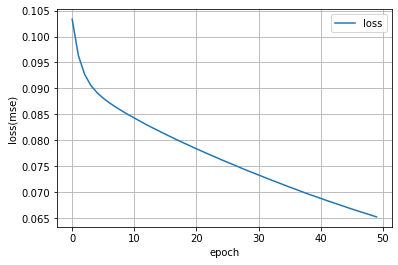

In [10]:
plt.figure(0)
plt.plot(history, label='loss')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss(mse)')
plt.show()

### 參考資料

https://discuss.pytorch.org/t/runtimeerror-expected-dtype-float-but-got-dtype-long-for-my-loss-function-despite-converting-all-tensors-to-float/87185

https://discuss.pytorch.org/t/pytocrh-way-for-one-hot-encoding-multiclass-target-variable/68321